In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re #Regular Expressions

In [163]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\2manu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [175]:
import matplotlib as plt
import matplotlib.pyplot as plt

In [208]:
df = pd.read_csv("C:/Users/2manu/HW1/Train.csv", sep = "#EOF", engine = 'python', header = None)

In [6]:
tf = pd.read_csv("C:/Users/2manu/HW1/Test.csv", sep = "#EOF", engine = 'python', header = None)

In [9]:
df

,0,1
0,+1\tOne of my all-time favorite so-laughably-l...,NaN
1,"-1\tI had high hopes for this film, because I ...",NaN
2,"-1\tWhen this was released, I thought this was...",NaN
3,-1\tI just watched this movie on Starz. Let me...,NaN
4,+1\tI loved it so much that I bought the DVD a...,NaN
...,...,...
24995,+1\tIt was a doubly interesting experience. Fo...,NaN
24996,-1\tWow what a great premise for a film : Set ...,NaN
24997,-1\tA lot of death happens in the wild. You do...,NaN
24998,+1\tCorean cinema can be quite surprising for ...,NaN


In [219]:
tf

,0,1
0,"This is a very low budget film, set in one loc...",NaN
1,One minute into THE UNTOLD and it`s already ri...,NaN
2,I recently purchased this on DVD as I hadn't h...,NaN
3,Some people have the ability to use only 3 neu...,NaN
4,"As I've said in the title of this review, It p...",NaN
...,...,...
24995,This movie looked like the out-takes of the de...,NaN
24996,This is one of my three all-time favorite movi...,NaN
24997,Most families will recognise similarities betw...,NaN
24998,I stumbled upon this movie by accident. I mean...,NaN


In [7]:
tf.columns = ['Review', 'del']

In [8]:
test = tf['Review']

In [209]:
Score=[]
Rev=[]

for i in range (0,len(df)):
    j = df.loc[i][0]
    split = j.split("\t")
    Score.append(split[0])
    Rev.append(split[1])

Bag = {"Score": Score, "Reviews": Rev}
df = pd.DataFrame(Bag)

In [210]:
df

,Score,Reviews
0,+1,One of my all-time favorite so-laughably-lousy...
1,-1,"I had high hopes for this film, because I thou..."
2,-1,"When this was released, I thought this was one..."
3,-1,I just watched this movie on Starz. Let me go ...
4,+1,I loved it so much that I bought the DVD and t...
...,...,...
24995,+1,It was a doubly interesting experience. For so...
24996,-1,Wow what a great premise for a film : Set it a...
24997,-1,A lot of death happens in the wild. You don't ...
24998,+1,Corean cinema can be quite surprising for an o...


In [13]:
df.columns

Index(['Score', 'Reviews'], dtype='object')

In [214]:
plot = df['Score'].value_counts()

plot

-1    12500
+1    12500
Name: Score, dtype: int64

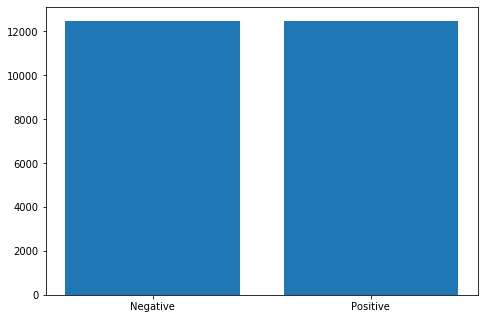

In [216]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Reviews = ['Negative', 'Positive']
Num = [plot[-1], plot[+1]]
ax.bar(Reviews,Num)
plt.show()

In [12]:
print(df.iloc[[26]]) #.loc didn't work

   Score                                            Reviews
26    +1  Eddie Murphy Delirious is undoubtedly the funn...


In [14]:
le = LabelEncoder()

In [15]:
y = df['Score'].values #to convert pandas form into numpy array

In [16]:
y

array(['+1', '-1', '-1', ..., '-1', '+1', '+1'], dtype=object)

In [17]:
Y = le.fit_transform(y) #pos 1 = 1; neg 1 = 0

In [18]:
Y

array([0, 1, 1, ..., 1, 0, 0])

In [19]:
Y_f = 1 - Y

In [20]:
Y_f

array([1, 0, 0, ..., 0, 1, 1])

In [21]:
Y_f[:50]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1])

In [22]:
df['Reviews'][9]

'This movie is terrible. TERRIBLE. One of the worst movies ever. I cannot even imagine Gigli being worse that this. Previews made us say "NO", but then looking for something amid the dreck out there right now, we decided to go ahead and give it a shot.<br /><br />STUPID US.<br /><br />Affleck is NOT an actor. He\'s an image and can look good with explosions, but not even the kind Bruce Willis got in "Die Hard". If he stripped his shirt and ran around fighting bad guys, it would be a comedy.<br /><br />The best part was Catherine O\'Hara -- she\'s always good. Gandolfini flops again (if it weren\'t for The Sopranos, he\'d be washed up) like he did in "The Mexican".<br /><br />Affleck hogs every scene and as others have said -- no character has any motivation whatsoever for their actions. <br /><br />AVOID THIS MOVIE AT ALL COSTS. '

In [23]:
stws = stopwords.words('english') #py -3.7 -m pip install nltk

In [24]:
ps = PorterStemmer() #this will preprocess the data

In [25]:
lt = WordNetLemmatizer()

In [26]:
def cleaned_rev_joined_stem(sample): #sample as it can be any random review/text
    sample = sample.lower()
    sample = sample.replace("<br /><br />", "")
    sample = re.sub("[^a-zA-jZ]+"," ", sample)
    sample = sample.split() #split(" ") default split by space
    
    sample = [ps.stem(s) for s in sample if s not in stws] #list comprehension with stemming
    sample = [lt.lemmatize(i) for i in sample]
    #sample = [s for s in sample if s not in stws] #list comprehension without stemming
    
    sample = " ".join(sample)
    
    return sample

In [217]:
#df['Prep_Review'] = df['Reviews'].apply(cleaned_rev_joined_stem)

In [29]:
test['Prep_Review'] = test.apply(cleaned_rev_joined_stem)

<ipython-input-29-c873f4553654>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prep_Review'] = test.apply(cleaned_rev_joined_stem)


In [34]:
train_bag = df['Prep_Review'].values #.value converts it into numpy from pandas

In [35]:
train_bag

array(['one time favorit laughabl lousi total lovabl el cheapo stinko nickel n dime independ horror creatur featur enjoy dread marvel releas formid fecund exploit outfit crown intern pictur could play numer crappi doubl bill countless drive in back eventu wound rerun like crazi sever small time secondari cabl station throughout natur first saw glorious ghastli abomin late night televis one fate saturday even earli teen deep seat albeit complet irrat abid fond ever sinc meteorit fall sky crash still water tranquil countri lake therebi caus heretofor dormant dinosaur egg hatch cours babi dino immedi grow gigant waddl grunt teeth gnash prehistor behemoth goofi flipper extend neck huge mouth full littl sharp jag stalagmit like chomper southern fri male cousin loch ness monster promptli start chow variou luckless local yokel resid previous quiet sleepi hillbilli resort town drippi stalwart sheriff richard cardella assist pain idiot hayse comic relief brotherli fish guid duo glenn robert mar

In [35]:
test_bag = test['Prep_Review'].values

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [30]:
tfidf = TfidfVectorizer()

In [38]:
X_train_tfidf = tfidf.fit_transform(train_bag)

In [39]:
X_test_tfidf = tfidf.transform(test_bag)

<25000x70976 sparse matrix of type '<class 'numpy.float64'>'
	with 2341492 stored elements in Compressed Sparse Row format>

In [42]:
X_test_tfidf

<25000x70976 sparse matrix of type '<class 'numpy.float64'>'
	with 2293999 stored elements in Compressed Sparse Row format>

Cosine Similarity

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
cs = cosine_similarity(X_test_tfidf, X_train_wt)

In [45]:
cs

array([[0.02456665, 0.04573063, 0.0396872 , ..., 0.03987518, 0.0541265 ,
        0.04621835],
       [0.02218302, 0.0406358 , 0.1031707 , ..., 0.03802199, 0.0495488 ,
        0.02724528],
       [0.02598966, 0.01422231, 0.04292663, ..., 0.00684698, 0.05870772,
        0.07401918],
       ...,
       [0.01531705, 0.02497788, 0.04454334, ..., 0.02766161, 0.0723699 ,
        0.0198918 ],
       [0.0445442 , 0.01788178, 0.05424373, ..., 0.03570718, 0.04258252,
        0.03287905],
       [0.02215335, 0.01695519, 0.02252441, ..., 0.02338865, 0.03734186,
        0.01798841]])

KNN

In [203]:
def KNN(var, k):
   
    return np.argsort(-var)[:k]
     

def predict(nearestNeighbors, labels):
    
    positiveReviewsCount = 0
    negativeReviewsCount = 0
    for neighbor in nearestNeighbors:
        if int(labels[neighbor]) == 1:
            positiveReviewsCount += 1
        else:
            negativeReviewsCount += 1
    if positiveReviewsCount > negativeReviewsCount:
        return 1
    else:
        return -1

In [47]:


k = 143
test_sentiments = list()

for similarity in cs:
    knn = KNN(similarity, k)
    prediction = predict(knn, Y_f)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')

In [48]:
#Write the result to a .dat file
output = open('y_pred.dat', 'w')

output.writelines( "%s\n" % item for item in test_sentiments )

output.close()

# Test - Train split

In [32]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train_bag, Y_f, test_size = 0.2, random_state = 1)

In [37]:
X_train

array(['earth best movi funni realli sweet good plot uniqu like movi similar stori line comedi stori movi also good end',
       'hindi movi buff sinc age never life watch move impact movi especi hindi film past sever year stop watch contemporari hindi movi revert watch classic teesri kasam mere huzoor madhumati mother india sholay etc movi chang everyth one best movi ever seen found move also found educ someon first gener indian woman grow america help understand famili histori alway someth abstract see feel understand help sympath gener struggl indian peopl endur film help put mani thing perspect especi consid current world event never thought movi could chang way think like plot fantast act superb direct flawless two thumb',
       'young woman suffer delus werewolf base upon famili legend ancestor accus kill allegedli one due past treatment men travel countrysid seduc kill men meet fall love kind man life appear take turn better rape lover kill band thug traumat latest event woman 

In [38]:
X_test

array(['spaceship return mar coupl month earlier person expedit sent red planet pictur flashback transpir pictur saddl inan melodramat dialog typic mani sci fi effort fifti sixti note exampl ship command mohr tell anoth crew member stay reason move anoth spot insid ship caus problem later command order two crew remain ship anoth go outsid two order stay say way follow high hope expedit success point much talk ear twitch hug freez ray gun name cleo short cleopatra cours would least pretti funni unintent stori drag slow pace whole thing astronaut spend much time look ship window portal chang color red blue comment see outsid actual explor martian landscap advertis film cinemag usual resembl anim cut out draw shot orang red filter give illus interact actor take odd surrealist appear due process think fool anyon year old one clever mention notic memori surviv astronaut would ting unreal would explain unreal natur martian vista oh okay amus astronaut action begin explor right bat test freez

In [39]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

In [40]:
y_test

array([0, 0, 1, ..., 0, 1, 0])

In [44]:
X_train_split = tfidf.fit_transform(X_train)

In [45]:
X_test_split = tfidf.transform(X_test)

In [49]:
cos_split = cosine_similarity(X_test_split, X_train_split)

In [50]:
len(cos_split)

5000

In [41]:
def KNN(var, k):
    
    return np.argsort(-var)[:k]
     

def predict(nbs, labels):
    positiveReviewsCount = 0
    negativeReviewsCount = 0
    for neighbor in nbs:
        if int(labels[neighbor]) == 1:
            positiveReviewsCount += 1
        else:
            negativeReviewsCount += 1
    if positiveReviewsCount > negativeReviewsCount:
        return 1
    else:
        return -1

In [147]:
from sklearn.metrics import f1_score

Testing Values from 3 to 201 randomly

In [198]:
k = 3
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8001499812523434

In [185]:
k = 7
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8132114200410524

In [186]:
k = 15
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.819764177428411

In [187]:
k = 23
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8148008306588634

In [188]:
k = 33
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8181126331811264

In [189]:
k = 45
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8182683158896289

In [190]:
k = 57
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8203259827420901

In [191]:
k = 69
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8247541931752459

In [192]:
k = 81
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8247780779621767

In [193]:
k = 95
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8255020471826866

In [194]:
k = 101
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8263075722092116

In [218]:
k = 113
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8262230919765167

In [195]:
k = 131
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8276947285601888

In [196]:
k = 143
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8277898051564653

In [197]:
k = 157
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8268200753818686

In [199]:
k = 171
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.826900119379228

In [200]:
k = 193
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8242132691922229

In [201]:
k =201
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8257469420493284

In [204]:
k =201
test_sentiments = list()

for similarity in cos_split:
    knn = KNN(similarity, k)
    prediction = predict(knn, y_train)
    
    #To write to the list as +1 instead of just a 1 for positive reviews
    if prediction == 1:
        test_sentiments.append('+1')
    else:
        test_sentiments.append('-1')


test_sentiments

k = le.fit_transform(test_sentiments)

k

y_pred_split = 1 - k

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_split)

f1

0.8257469420493284

Thus, the maximum value is '0.827' for k = 143